In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
from numpy import linalg as LA
from helper_functions import *
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})

In [3]:
parname = 'param_base'
param = np.load('mf_parameter_files/%s.npy'%parname)

#unpack
taume, taump, taums, taumv, sigma_e, sigma_p, sigma_s, sigma_v,\
           j_ee, j_ep, j_es, j_ev, j_pe, j_pp, j_ps, j_pv, j_se, j_sp, j_ss, j_sv, j_ve, j_vp, j_vs, j_vv,\
           q_e, q_p, q_s, q_v, epsilon, \
           kbar_ee, kbar_ep, kbar_es,kbar_ev,\
           kbar_pe, kbar_pp, kbar_ps, kbar_pv,\
           kbar_se, kbar_sp, kbar_ss, kbar_sv,\
           kbar_ve, kbar_vp, kbar_vs, kbar_vv,\
           sigma_o, p_e, p_p, p_s, p_v, jbar_e, jbar_p, jbar_s, jbar_v = param

# constants
Vth = 1
Vre = 0
Vlb = -1
EL = 0.

Cme = 1
gLe = Cme / taume
Cmp = 1
gLp = Cmp / taump
Cms = 1
gLs = Cms / taums
Cmv = 1
gLv = Cmv / taumv
print(taume,taump,taums, taumv)

dv0 = 0.01
vs = np.arange(Vlb, Vth, dv0)

# spatial resolution
x_res = 0.005
xpoints = int(1/x_res)

# projections
x, proj_e = wrapped_gaussian(0., sigma_e, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_p = wrapped_gaussian(0., sigma_p, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_s = wrapped_gaussian(0., sigma_s, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_v = wrapped_gaussian(0., sigma_v, npoints=2, xpoints=xpoints, xleft=0, xright=1)

# synaptic weights
j_mat = np.array([[j_ee, j_ep, j_es, j_ev], [ j_pe, j_pp, j_ps, j_pv], [j_se, j_sp, j_ss, j_sv], [j_ve, j_vp, j_vs, j_vv]])
# j_mat = np.array([[j_ee, j_ep, j_es, j_ev], [ j_pe, j_pp, j_ps, j_pv], [j_se, j_sp, j_ss, j_sv], [j_ve, j_vp, j_vs, j_vv]])



# q_e, q_p, q_s, q_v = 0.8, 0.2, 0., 0.0
q_mat = np.array([[q_e, q_p, q_s, q_v] for _ in range(4)])


# connection probabilities
kbar_mat = np.array([[kbar_ee, kbar_ep, kbar_es, kbar_ev], [ kbar_pe, kbar_pp, kbar_ps, kbar_pv],
                     [kbar_se, kbar_sp, kbar_ss, kbar_sv], [kbar_ve, kbar_vp, kbar_vs, kbar_vv]])


wbar_mat = q_mat * j_mat * kbar_mat
wbar_ee = wbar_mat[0,0]
wbar_ep = wbar_mat[0,1]
wbar_es = wbar_mat[0,2]
wbar_ev = wbar_mat[0,3]
wbar_pe = wbar_mat[1,0]
wbar_pp = wbar_mat[1,1]
wbar_ps = wbar_mat[1,2]
wbar_pv = wbar_mat[1,3]
wbar_se = wbar_mat[2,0]
wbar_sp = wbar_mat[2,1]
wbar_ss = wbar_mat[2,2]
wbar_sv = wbar_mat[2,3]
wbar_ve = wbar_mat[3,0]
wbar_vp = wbar_mat[3,1]
wbar_vs = wbar_mat[3,2]
wbar_vv = wbar_mat[3,3]

30.0 20.0 20.0 20.0


# Fig3a

sigma_e= 0.001
sigma_e= 0.002
sigma_e= 0.003
sigma_e= 0.004
sigma_e= 0.005
sigma_e= 0.006
sigma_e= 0.007
sigma_e= 0.008
sigma_e= 0.009000000000000001
sigma_e= 0.010000000000000002
sigma_e= 0.011
sigma_e= 0.012
sigma_e= 0.013000000000000001
sigma_e= 0.014000000000000002
sigma_e= 0.015
sigma_e= 0.016
sigma_e= 0.017
sigma_e= 0.018000000000000002
sigma_e= 0.019000000000000003
sigma_e= 0.02
sigma_e= 0.021
sigma_e= 0.022000000000000002
sigma_e= 0.023
sigma_e= 0.024
sigma_e= 0.025
sigma_e= 0.026000000000000002
sigma_e= 0.027000000000000003
sigma_e= 0.028
sigma_e= 0.029
sigma_e= 0.030000000000000002
sigma_e= 0.031
sigma_e= 0.032
sigma_e= 0.033
sigma_e= 0.034
sigma_e= 0.035
sigma_e= 0.036000000000000004
sigma_e= 0.037000000000000005
sigma_e= 0.038
sigma_e= 0.039
sigma_e= 0.04
sigma_e= 0.041
sigma_e= 0.042
sigma_e= 0.043000000000000003
sigma_e= 0.044000000000000004
sigma_e= 0.045
sigma_e= 0.046
sigma_e= 0.047
sigma_e= 0.048
sigma_e= 0.049
sigma_e= 0.05
sigma_e= 0.051000000000000004
sigma_e= 0.05

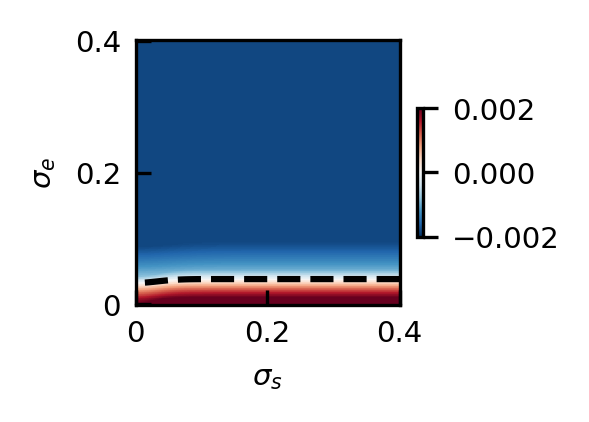

In [4]:
sigma_e_vals = np.arange(0.001,0.401,0.001)
sigma_s_vals = np.arange(0.001,0.401,0.001)

max_ev = np.zeros([len(sigma_e_vals), len(sigma_s_vals)])
sigma_p = 0.1

contour_lines = []
NN= []

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
for N in [300000]:
    for eidx, sigma_e in enumerate(sigma_e_vals):
        print('sigma_e=', sigma_e)
        for sidx, sigma_s in enumerate(sigma_s_vals):

            gamma=1.0
            eps = 1/(gamma*np.sqrt(N))
            all_reals=[]
            x=[]
            y=[]
            for n in range(50):
                An = np.array([[ - eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ep*g_bar(n, 0, sigma_p), -wbar_es*g_bar(n, 0, sigma_s), -wbar_ev*g_bar(n, 0, sigma_v)],
                 [wbar_pe*g_bar(n, 0, sigma_e), -eps -wbar_pp*g_bar(n, 0, sigma_p), -wbar_ps*g_bar(n, 0, sigma_s), -wbar_pv*g_bar(n, 0, sigma_v)],
                 [wbar_se*g_bar(n, 0, sigma_e), -wbar_sp*g_bar(n, 0, sigma_p), -eps -wbar_ss*g_bar(n, 0, sigma_s), -wbar_sv*g_bar(n, 0, sigma_v)],
                     [wbar_ve*g_bar(n, 0, sigma_e), -wbar_vp*g_bar(n, 0, sigma_p), -wbar_vs*g_bar(n, 0, sigma_s), -eps-wbar_vv*g_bar(n, 0, sigma_v)] ])
                eigenvalues, eigenvectors = LA.eig(An)
        
                real_parts=np.real(eigenvalues)
                img_parts = np.imag(eigenvalues)
                max_real = np.max(real_parts)
                all_reals.append(max_real)

                x += [n-0.5,n+0.5]
                y += [max_real, max_real]
    #             plt.scatter(x, y, c='black')
    #         plt.show()
            max_val = np.max(all_reals)
#             print(sigma_e, sigma_s, max_val)
            max_ev[eidx, sidx] = max_val

    data = max_ev.copy()

    # Set the size of the figure
    plt.figure(figsize=(40/25.4, 40/25.4),  dpi=300)  # Width: 8 inches, Height: 6 inches


    # Define a custom colormap where negative values are blue and positive values are red
    cmap = plt.cm.RdBu_r

    # Plot the data using imshow with the custom colormap
    plt.imshow(data, cmap=cmap, interpolation='nearest',vmin=-0.002,vmax=0.002)

    # Add color bar
    plt.colorbar(shrink=0.4) 



    # Draw a contour line at the boundary between positive and negative regions
    contour = plt.contour(data, levels=[0],  colors='black', linestyles='--')

    plt.gca().invert_yaxis()
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.xlabel(r"$\sigma_s$")
    plt.ylabel(r"$\sigma_e$")

    plt.xticks([0,199,399], [0,0.2,0.4])
    plt.yticks([0,199,399], [0,0.2,0.4])

#     plt.text(19, 4, '*', fontsize=9, horizontalalignment='center', verticalalignment='center', c='black')
    # Extract the contour line
    paths = contour.collections[0].get_paths()

    # Loop through each path and extract the vertices of the contour line
    
    plt.savefig('figs/Fig3a_epsv.svg')
    plt.show()
    
    if len(paths) == 0:
        continue
    else:
        NN.append(N)
        contour_lines.append(paths[0].vertices)


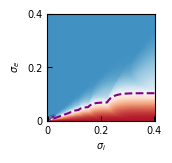

In [5]:
#  w      jab   q     kbarab
wbar_ee = j_ee * 0.8 * kbar_ee 
wbar_ei = j_ep * 0.2 * kbar_ep
wbar_ie = j_pe * 0.8 * kbar_pe
wbar_ii = j_pp * 0.2 * kbar_pp

sigma_e_vals = np.arange(0.001,0.401,0.001)
sigma_i_vals = np.arange(0.001,0.401,0.001)

max_ev = np.zeros([len(sigma_e_vals), len(sigma_i_vals)])

x, y = [], []
NN, contour_lines = [], []

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
for N in [3e5]:
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    for eidx, sigma_e in enumerate(sigma_e_vals):
        for iidx, sigma_i in enumerate(sigma_i_vals):
            gamma=1.0
            eps = 1/(gamma*np.sqrt(N))
            all_reals=[]
            for n in range(50):
                An = np.array([[-eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ei*g_bar(n, 0, sigma_i)],
                     [wbar_ie*g_bar(n, 0, sigma_e), -eps -wbar_ii*g_bar(n, 0, sigma_i)]])
                eigenvalues, eigenvectors = LA.eig(An)
                real_parts=np.real(eigenvalues)
                img_parts = np.imag(eigenvalues)
                max_real = np.max(real_parts)
                all_reals.append(max_real)
            max_val = np.max(all_reals)
            max_ev[eidx, iidx] = max_val


    data = max_ev.copy()
    
    # Set the size of the figure
    plt.figure(figsize=(40/25.4, 40/25.4))

    # Define a custom colormap where negative values are blue and positive values are red
    cmap = plt.cm.RdBu_r

    # Plot the data using imshow with the custom colormap
    plt.imshow(data, cmap=cmap, interpolation='nearest',vmin=-0.003, vmax=0.003)
    # Add color bar
    plt.colorbar(shrink=0.4) 
    
    # Draw a contour line at the boundary between positive and negative regions
    contour = plt.contour(data, levels=[0],  colors='purple', linestyles='--')
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)
    
    plt.text(19, 4, '*', fontsize=9, horizontalalignment='center', verticalalignment='center', c='purple')
    plt.gca().invert_yaxis()

    plt.xlabel(r"$\sigma_i$")
    plt.ylabel(r"$\sigma_e$")

    plt.xticks([0,199,399], [0,0.2,0.4])
    plt.yticks([0,199,399], [0,0.2,0.4])
    
    plt.savefig('figs/Fig3a_ei.svg')
    plt.show()

## Fig. 3b

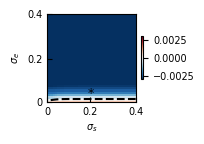

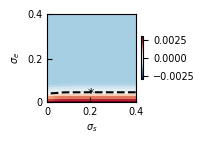

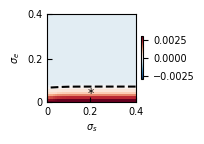

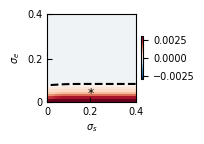

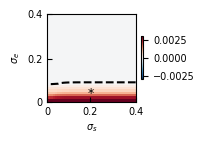

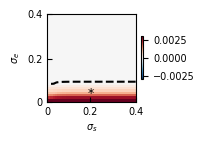

In [9]:
sigma_e_vals = np.arange(0.01,0.401,0.01)
sigma_s_vals = np.arange(0.01,0.401,0.01)

max_ev = np.zeros([len(sigma_e_vals), len(sigma_s_vals)])
sigma_p = 0.1

contour_lines = []
NN= []

Nlist = np.arange(2e4,1e6+1, 2e4)

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
for N in [1e5, 1e6, 1e7, 1e8, 1e9, 1e10]:
    for eidx, sigma_e in enumerate(sigma_e_vals):
#         print('sigma_e=', sigma_e)
        for sidx, sigma_s in enumerate(sigma_s_vals):

            gamma=1.0
            eps = 1/(gamma*np.sqrt(N))
#             eps=0
            all_reals=[]
            x=[]
            y=[]
            for n in range(50):
                An = np.array([[ - eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ep*g_bar(n, 0, sigma_p), -wbar_es*g_bar(n, 0, sigma_s), -wbar_ev*g_bar(n, 0, sigma_v)],
                 [wbar_pe*g_bar(n, 0, sigma_e), -eps -wbar_pp*g_bar(n, 0, sigma_p), -wbar_ps*g_bar(n, 0, sigma_s), -wbar_pv*g_bar(n, 0, sigma_v)],
                 [wbar_se*g_bar(n, 0, sigma_e), -wbar_sp*g_bar(n, 0, sigma_p), -eps -wbar_ss*g_bar(n, 0, sigma_s), -wbar_sv*g_bar(n, 0, sigma_v)],
                     [wbar_ve*g_bar(n, 0, sigma_e), -wbar_vp*g_bar(n, 0, sigma_p), -wbar_vs*g_bar(n, 0, sigma_s), -eps-wbar_vv*g_bar(n, 0, sigma_v)] ])
                eigenvalues, eigenvectors = LA.eig(An)
        
                real_parts=np.real(eigenvalues)
                img_parts = np.imag(eigenvalues)
                max_real = np.max(real_parts)
                all_reals.append(max_real)

                x += [n-0.5,n+0.5]
                y += [max_real, max_real]
            max_val = np.max(all_reals)
            max_ev[eidx, sidx] = max_val

    data = max_ev.copy()

    # Set the size of the figure
    plt.figure(figsize=(40/25.4, 40/25.4))  # Width: 8 inches, Height: 6 inches


    # Define a custom colormap where negative values are blue and positive values are red
    cmap = plt.cm.RdBu_r

    # Plot the data using imshow with the custom colormap
    plt.imshow(data, cmap=cmap, interpolation='nearest',vmin=-0.003,vmax=0.003)

    # Add color bar
    plt.colorbar(shrink=0.4) 

    # Draw a contour line at the boundary between positive and negative regions
    contour = plt.contour(data, levels=[0],  colors='black', linestyles='--')

    plt.gca().invert_yaxis()
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.xlabel(r"$\sigma_s$")
    plt.ylabel(r"$\sigma_e$")

    # plt.xticks([19,39,59], [0.2,0.4,0.6])
    # plt.yticks([19,39,59], [0.2,0.4,0.6])
    plt.xticks([0,19,39], [0,0.2,0.4])
    plt.yticks([0,19,39], [0,0.2,0.4])

    plt.xlim(0,39)
    plt.ylim(0,39)

    plt.text(19, 4, '*', fontsize=9, horizontalalignment='center', verticalalignment='center', c='black')
    # Extract the contour line
    paths = contour.collections[0].get_paths()

    # Loop through each path and extract the vertices of the contour line
    plt.show()
    if len(paths) == 0:
        continue
    else:
        NN.append(N)
        contour_lines.append(paths[0].vertices)

NN_4 = NN
contour_lines_4 = contour_lines

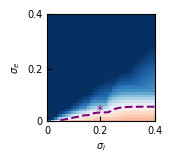

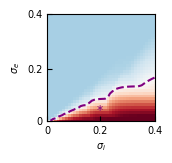

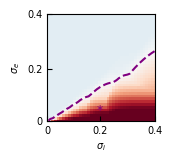

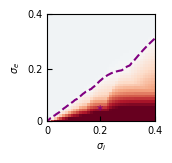

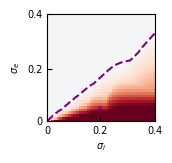

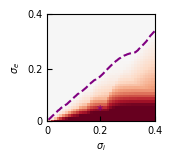

In [7]:
#  w      jab   q     kbarab
wbar_ee = j_ee * 0.8 * kbar_ee 
wbar_ei = j_ep * 0.2 * kbar_ep
wbar_ie = j_pe * 0.8 * kbar_pe
wbar_ii = j_pp * 0.2 * kbar_pp

sigma_e_vals = np.arange(0.01,0.41,0.01)
sigma_i_vals = np.arange(0.01,0.41,0.01)

max_ev = np.zeros([len(sigma_e_vals), len(sigma_i_vals)])

x, y = [], []
NN, contour_lines = [], []

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
for N in [1e5, 1e6, 1e7, 1e8, 1e9, 1e10]:
# for N in [1e8]:
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    for eidx, sigma_e in enumerate(sigma_e_vals):
#         print('sigma_e=', sigma_e)
        for iidx, sigma_i in enumerate(sigma_i_vals):
            gamma=1.0
            eps = 1/(gamma*np.sqrt(N))
            all_reals=[]
            for n in range(50):
                An = np.array([[-eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ei*g_bar(n, 0, sigma_i)],
                     [wbar_ie*g_bar(n, 0, sigma_e), -eps -wbar_ii*g_bar(n, 0, sigma_i)]])
                eigenvalues, eigenvectors = LA.eig(An)
                real_parts=np.real(eigenvalues)
                img_parts = np.imag(eigenvalues)
                max_real = np.max(real_parts)
                all_reals.append(max_real)
            max_val = np.max(all_reals)
            max_ev[eidx, iidx] = max_val


    data = max_ev.copy()
    # Set the size of the figure
    plt.figure(figsize=(40/25.4, 40/25.4))


    # Define a custom colormap where negative values are blue and positive values are red
    cmap = plt.cm.RdBu_r

    # Plot the data using imshow with the custom colormap
    plt.imshow(data, cmap=cmap, interpolation='nearest',vmin=-0.003, vmax=0.003)
    # Add color bar
#     plt.colorbar(shrink=0.4) 
    # Draw a contour line at the boundary between positive and negative regions
    contour = plt.contour(data, levels=[0],  colors='purple', linestyles='--')
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)
    
    plt.text(19, 4, '*', fontsize=9, horizontalalignment='center', verticalalignment='center', c='purple')
#     plt.text(19, 4, '*', fontsize=9, horizontalalignment='center', verticalalignment='center', c='purple')
    plt.gca().invert_yaxis()

    plt.xlabel(r"$\sigma_i$")
    plt.ylabel(r"$\sigma_e$")

    plt.xticks([0, 19,39], [0, 0.2,0.4])
    plt.yticks([0, 19,39], [0,0.2,0.4])
    plt.xlim(0,39)
    plt.ylim(0,39)
    # Add color bar
    # plt.colorbar()

    # Show plot
    plt.show()
#     plt.savefig('stability_figs/stability_2pop_%s_1e8.svg'%parname)
    paths = contour.collections[0].get_paths()
    
    if len(paths) == 0:
        continue
    else:
        NN.append(N)
        contour_lines.append(paths[0].vertices)
        
NN_2 = NN
contour_lines_2 = contour_lines

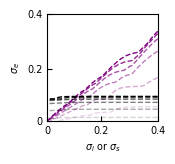

In [10]:
fig, ax = plt.subplots(figsize=(40/25.4, 40/25.4))
for i, line in enumerate(contour_lines_2):
    ax.plot(line[:, 0], line[:, 1], '--', color='purple', lw = 1, alpha = (i+1)/len(contour_lines_2))
    
for i, line in enumerate(contour_lines_4):
    ax.plot(line[:, 0], line[:, 1], '--', color='black', lw = 1, alpha =  (i+1)/len(contour_lines_2))
    
plt.xticks([0,19,39], [0,0.2,0.4])
plt.yticks([0,19,39], [0,0.2,0.4])

plt.xlim(0,39)
plt.ylim(0,39)

plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xlabel(r"$\sigma_i$ or $\sigma_s$")
plt.ylabel(r"$\sigma_e$")
plt.savefig('figs/Fig3b.svg')

### Fig. 3c-e

In [18]:
#4-pop
sigma_p, sigma_s = 0.1, 0.2
sigma_v = 0.1
N = 300000

# Initialize arrays to store results across sigma_e values
sigma_e_values = [0.001*i for i in range(1,201)]
stored_img_parts = []  # Store imaginary parts for each sigma_e
stored_real_parts = []  # Store leading real parts for each sigma_e
nmax = [] # Store peak n vals


for sigma_e in sigma_e_values:

    simname = 'e%s_p%s_s%s'%(sigma_e, sigma_p, sigma_s)
    x, y = [], []
    
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    # Store eigenvalues for this sigma_e
    current_img_parts = []
    current_real_parts = []

    for n in range(50):
        An = np.array([[ - eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ep*g_bar(n, 0, sigma_p), -wbar_es*g_bar(n, 0, sigma_s), -wbar_ev*g_bar(n, 0, sigma_v)],
                 [wbar_pe*g_bar(n, 0, sigma_e), -eps -wbar_pp*g_bar(n, 0, sigma_p), -wbar_ps*g_bar(n, 0, sigma_s), -wbar_pv*g_bar(n, 0, sigma_v)],
                 [wbar_se*g_bar(n, 0, sigma_e), -wbar_sp*g_bar(n, 0, sigma_p), -eps -wbar_ss*g_bar(n, 0, sigma_s), -wbar_sv*g_bar(n, 0, sigma_v)],
                     [wbar_ve*g_bar(n, 0, sigma_e), -wbar_vp*g_bar(n, 0, sigma_p), -wbar_vs*g_bar(n, 0, sigma_s), -eps-wbar_vv*g_bar(n, 0, sigma_v)] ])

        eigenvalues, eigenvectors = LA.eig(An)
        real_parts=np.real(eigenvalues)
        img_parts = np.imag(eigenvalues)
        max_real = np.max(real_parts)
        x += [n-0.5,n+0.5]
        y += [max_real, max_real]
        
        # Store all eigenvalue parts for this n
        current_img_parts.extend(img_parts)
        current_real_parts.extend(real_parts)
        
        for i in range(4):
            if real_parts[i]>0 and img_parts[i]>0:
                print(f'POSITIVE RE and IMG: n={n}, lambda={eigenvalues[i]}')

        # Masks
        real_mask   = np.isclose(img_parts, 0)
        complex_mask = ~real_mask
        stable_mask = real_parts < 0
        unstable_mask = real_parts > 0

        # Categories
        stable_real     = real_mask & stable_mask
        unstable_real   = real_mask & unstable_mask
        stable_complex  = complex_mask & stable_mask
        unstable_complex= complex_mask & unstable_mask

    # Store the results for this sigma_e
    stored_img_parts.append(current_img_parts)
    stored_real_parts.append(current_real_parts)

    imax = np.argmax(y)
    nmax.append(x[imax])

print(f"Stored data for {len(sigma_e_values)} sigma_e values")
print(f"sigma_e_values: array of length {len(sigma_e_values)}")
print(f"stored_img_parts: list of length {len(stored_img_parts)}, each containing {len(stored_img_parts[0])} eigenvalues")
print(f"stored_real_parts: list of length {len(stored_real_parts)}, each containing {len(stored_real_parts[0])} eigenvalues")

POSITIVE RE and IMG: n=14, lambda=(0.0023586711186050578+6.671676866665192e-20j)
POSITIVE RE and IMG: n=14, lambda=(0.0022785039509429904+6.671676866665189e-20j)
POSITIVE RE and IMG: n=22, lambda=(0.0020737957022947673+4.717587954304375e-20j)
POSITIVE RE and IMG: n=14, lambda=(0.0021688435917502627+6.671676866665192e-20j)
Stored data for 200 sigma_e values
sigma_e_values: array of length 200
stored_img_parts: list of length 200, each containing 200 eigenvalues
stored_real_parts: list of length 200, each containing 200 eigenvalues


In [20]:
sigma_i = 0.2
N = 300000

# Initialize arrays to store results across sigma_e values (2-pop model)
sigma_e_values_2pop = [0.001*i for i in range(1,201)]
stored_img_parts_2pop = []  # Store imaginary parts for each sigma_e
stored_real_parts_2pop = []  # Store real parts for each sigma_e
nmax = []

for sigma_e in sigma_e_values_2pop:
# for sigma_e in [0.01,0.05,0.1]:
    simname = 'e%s_i%s'%(sigma_e, sigma_i)
    x, y = [], []
    
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    # Store eigenvalues for this sigma_e
    current_img_parts = []
    current_real_parts = []

    # plt.figure(figsize=(4,4), dpi=200)
    for n in range(51):
        An = np.array([[-eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ei*g_bar(n, 0, sigma_i)],
             [wbar_ie*g_bar(n, 0, sigma_e), -eps -wbar_ii*g_bar(n, 0, sigma_i)]])
        eigenvalues, eigenvectors = LA.eig(An)
        real_parts=np.real(eigenvalues)
        img_parts = np.imag(eigenvalues)
        max_real = np.max(real_parts)
        x += [n-0.5,n+0.5]
        y += [max_real, max_real]
        
        # Store all eigenvalue parts for this n
        current_img_parts.extend(img_parts)
        current_real_parts.extend(real_parts)
        

        for i in range(2):
            if real_parts[i]>0 and img_parts[i]>0:
                print(f'POSITIVE RE and IMG: n={n}, lambda={eigenvalues[i]}')


        # Masks
        real_mask   = np.isclose(img_parts, 0)
        complex_mask = ~real_mask
        stable_mask = real_parts < 0
        unstable_mask = real_parts > 0
        
        stable_real     = real_mask & stable_mask
        unstable_real   = real_mask & unstable_mask
        stable_complex  = complex_mask & stable_mask
        unstable_complex= complex_mask & unstable_mask


    # Store the results for this sigma_e
    stored_img_parts_2pop.append(current_img_parts)
    stored_real_parts_2pop.append(current_real_parts)

    imax = np.argmax(y)
    nmax.append(x[imax])
    
print(f"Stored 2-pop data for {len(sigma_e_values_2pop)} sigma_e values")
print(f"sigma_e_values_2pop: array of length {len(sigma_e_values_2pop)}")
print(f"stored_img_parts_2pop: list of length {len(stored_img_parts_2pop)}, each containing {len(stored_img_parts_2pop[0])} eigenvalues")
print(f"stored_real_parts_2pop: list of length {len(stored_real_parts_2pop)}, each containing {len(stored_real_parts_2pop[0])} eigenvalues")
nmax_2pop = nmax

POSITIVE RE and IMG: n=2, lambda=(7.491703998897966e-05+0.0012320892278000113j)
POSITIVE RE and IMG: n=2, lambda=(7.441382826840759e-05+0.0012323722441300406j)
POSITIVE RE and IMG: n=2, lambda=(7.357540690217925e-05+0.0012328431885576347j)
POSITIVE RE and IMG: n=2, lambda=(7.240217292286467e-05+0.0012335009399579732j)
POSITIVE RE and IMG: n=2, lambda=(7.089468173730393e-05+0.0012343439348471822j)
POSITIVE RE and IMG: n=2, lambda=(6.905364668838895e-05+0.001235370173411066j)
POSITIVE RE and IMG: n=2, lambda=(6.687993849253211e-05+0.0012365772271685752j)
POSITIVE RE and IMG: n=2, lambda=(6.437458455333268e-05+0.0012379622482062782j)
POSITIVE RE and IMG: n=2, lambda=(6.153876815231463e-05+0.0012395219799077335j)
POSITIVE RE and IMG: n=2, lambda=(5.837382751751547e-05+0.0012412527690909899j)
POSITIVE RE and IMG: n=2, lambda=(5.488125477102926e-05+0.0012431505794575685j)
POSITIVE RE and IMG: n=2, lambda=(5.106269475664343e-05+0.001245211006248188j)
POSITIVE RE and IMG: n=2, lambda=(4.691994

In [21]:
sigma_e_array = np.array(sigma_e_values)
img_parts_array = np.array(stored_img_parts)  # Shape: (num_sigma_e, num_eigenvalues)
real_parts_array = np.array(stored_real_parts)  # Shape: (num_sigma_e, num_eigenvalues)

sigma_e_array_2pop = np.array(sigma_e_values_2pop)
img_parts_array_2pop = np.array(stored_img_parts_2pop)
real_parts_array_2pop = np.array(stored_real_parts_2pop)

print(f"Data shapes:")
print(f"sigma_e_array: {sigma_e_array.shape}")
print(f"img_parts_array: {img_parts_array.shape}")
print(f"real_parts_array: {real_parts_array.shape}")

# Function to get leading (maximum) real parts for each sigma_e
def get_leading_real_parts():
    """Get the maximum real part for each sigma_e value"""
    return np.max(real_parts_array, axis=1)

# Function to get non-zero imaginary parts for each sigma_e
def get_nonzero_img_parts():
    """Get all non-zero imaginary parts for each sigma_e value"""
    nonzero_img = []
    for i in range(len(sigma_e_array)):
        nonzero_mask = np.abs(img_parts_array[i]) > 1e-10  # Avoid numerical zeros
        nonzero_img.append(img_parts_array[i][nonzero_mask])
    return nonzero_img


Data shapes:
sigma_e_array: (200,)
img_parts_array: (200, 200)
real_parts_array: (200, 200)


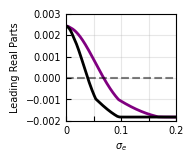

In [22]:
plt.figure(figsize=(40/25.4, 40/25.4))

leading_real_2pop = np.max(real_parts_array_2pop, axis=1)

plt.plot(sigma_e_array_2pop, leading_real_2pop, 'purple', linewidth=2)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
leading_real = get_leading_real_parts()

plt.plot(sigma_e_array, leading_real, 'black', linewidth=2)


plt.xlim(0,0.2)
plt.ylim(-0.002,0.003)
plt.grid(True, alpha=0.3)
plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xticks([0,0.05,0.1,0.15,0.2], [0,'',0.1,'',0.2])
plt.xlabel(r'$\sigma_e$')
plt.ylabel('Leading Real Parts')
# plt.title('σ_e vs Leading Real Parts (Stability Analysis)')
plt.grid(True, alpha=0.3)
plt.savefig('figs/Fig3c.svg')

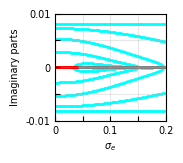

In [23]:
sigma_e_array = np.array(sigma_e_values)
img_parts_array = np.array(stored_img_parts)
real_parts_array = np.array(stored_real_parts)

plt.figure(figsize=(40/25.4, 40/25.4))

stable_sigma_e = []
stable_img = []
unstable_sigma_e = []
unstable_img = []

real_stable_sigma_e = []
real_stable_img = []
real_unstable_sigma_e = []
real_unstable_img = []

for i, sigma_e in enumerate(sigma_e_array):
    # Get non-zero imaginary parts and their corresponding real parts
    nonzero_mask = np.abs(img_parts_array[i]) > 1e-10
    nonzero_img = img_parts_array[i][nonzero_mask]
    corresponding_real = real_parts_array[i][nonzero_mask]
    
    zero_mask = np.abs(img_parts_array[i]) == 0
    zero_img = img_parts_array[i][zero_mask]
    zero_real = real_parts_array[i][zero_mask]

    if len(nonzero_img) > 0:
        # Separate stable (real < 0) and unstable (real > 0) eigenvalues
        stable_mask = corresponding_real < 0
        unstable_mask = corresponding_real > 0

        # Add stable eigenvalues (blue)
        stable_sigma_e.extend([sigma_e] * np.sum(stable_mask))
        stable_img.extend(nonzero_img[stable_mask])

        # Add unstable eigenvalues (red)
        unstable_sigma_e.extend([sigma_e] * np.sum(unstable_mask))
        unstable_img.extend(nonzero_img[unstable_mask])
        
        #For pure real
            # Separate stable (real < 0) and unstable (real > 0) eigenvalues
        stable_mask = zero_real < 0
        unstable_mask = zero_real > 0

        # Add stable eigenvalues (blue)
        real_stable_sigma_e.extend([sigma_e] * np.sum(stable_mask))
        real_stable_img.extend(zero_img[stable_mask])

        # Add unstable eigenvalues (red)
        real_unstable_sigma_e.extend([sigma_e] * np.sum(unstable_mask))
        real_unstable_img.extend(zero_img[unstable_mask])

# Plot stable eigenvalues in blue (rasterized to reduce SVG size)
if len(stable_sigma_e) > 0:
    sc_stable = plt.scatter(stable_sigma_e, stable_img, c='cyan', s=1, alpha=0.6)
    sc_stable.set_rasterized(True)

# Plot unstable eigenvalues in red (rasterized to reduce SVG size)
if len(unstable_sigma_e) > 0:
    sc_unstable = plt.scatter(unstable_sigma_e, unstable_img, c='magenta', s=1, alpha=0.6)
    sc_unstable.set_rasterized(True)
    
#real eigenvalues
    # Plot stable eigenvalues in blue (rasterized to reduce SVG size)
if len(real_stable_sigma_e) > 0:
    sc_stable = plt.scatter(real_stable_sigma_e, real_stable_img, c='gray', s=1, alpha=1)
    sc_stable.set_rasterized(True)

# Plot unstable eigenvalues in red (rasterized to reduce SVG size)
if len(real_unstable_sigma_e) > 0:
    sc_unstable = plt.scatter(real_unstable_sigma_e, real_unstable_img, c='red', s=1, alpha=1)
    sc_unstable.set_rasterized(True)

plt.xlabel(r'$\sigma_e$')
plt.ylabel('Imaginary parts')
# plt.title('σ_e vs Imaginary Parts (Spatial Frequency Check)')
plt.grid(True, alpha=0.3)
plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xticks([0,0.05,0.1,0.15,0.2], [0,'',0.1,'',0.2])

plt.xlim(0,0.2)
plt.ylim(-0.01, 0.01)
plt.yticks([-0.01, -0.005, 0, 0.005, 0.01], [-0.01,'',0,'',0.01])
# plt.legend()
plt.savefig('figs/Fig3e.svg', dpi=300)

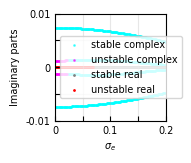

In [24]:
sigma_e_array_2pop = np.array(sigma_e_values_2pop)
img_parts_array_2pop = np.array(stored_img_parts_2pop)
real_parts_array_2pop = np.array(stored_real_parts_2pop)

plt.figure(figsize=(40/25.4, 40/25.4))

# Collect stable and unstable eigenvalues
stable_sigma_e = []
stable_img = []
unstable_sigma_e = []
unstable_img = []

real_stable_sigma_e = []
real_stable_img = []
real_unstable_sigma_e = []
real_unstable_img = []

for i, sigma_e in enumerate(sigma_e_array_2pop):
    # Get non-zero imaginary parts and their corresponding real parts
    nonzero_mask = np.abs(img_parts_array_2pop[i]) > 1e-10
    nonzero_img = img_parts_array_2pop[i][nonzero_mask]
    corresponding_real = real_parts_array_2pop[i][nonzero_mask]
    
    zero_mask = np.abs(img_parts_array_2pop[i]) == 0
    zero_img = img_parts_array_2pop[i][zero_mask]
    zero_real = real_parts_array_2pop[i][zero_mask]

    if len(nonzero_img) > 0:
        # Separate stable (real < 0) and unstable (real > 0) eigenvalues
        stable_mask = corresponding_real < 0
        unstable_mask = corresponding_real > 0

        # Add stable eigenvalues (blue)
        stable_sigma_e.extend([sigma_e] * np.sum(stable_mask))
        stable_img.extend(nonzero_img[stable_mask])

        # Add unstable eigenvalues (red)
        unstable_sigma_e.extend([sigma_e] * np.sum(unstable_mask))
        unstable_img.extend(nonzero_img[unstable_mask])
        
                #For pure real
            # Separate stable (real < 0) and unstable (real > 0) eigenvalues
        stable_mask = zero_real < 0
        unstable_mask = zero_real > 0

        # Add stable eigenvalues (blue)
        real_stable_sigma_e.extend([sigma_e] * np.sum(stable_mask))
        real_stable_img.extend(zero_img[stable_mask])

        # Add unstable eigenvalues (red)
        real_unstable_sigma_e.extend([sigma_e] * np.sum(unstable_mask))
        real_unstable_img.extend(zero_img[unstable_mask])

# Plot stable eigenvalues in blue (rasterized)
if len(stable_sigma_e) > 0:
    sc_stable = plt.scatter(stable_sigma_e, stable_img, c='cyan', s=1, alpha=0.6, label='stable complex')
    sc_stable.set_rasterized(True)

# Plot unstable eigenvalues in red (rasterized)
if len(unstable_sigma_e) > 0:
    sc_unstable = plt.scatter(unstable_sigma_e, unstable_img, c='magenta', s=1, alpha=0.6, label='unstable complex')
    sc_unstable.set_rasterized(True)
    
#real eigenvalues
    # Plot stable eigenvalues in blue (rasterized to reduce SVG size)
if len(real_stable_sigma_e) > 0:
    sc_stable = plt.scatter(real_stable_sigma_e, real_stable_img, c='gray', s=1, alpha=1, label='stable real')
    sc_stable.set_rasterized(True)

# Plot unstable eigenvalues in red (rasterized to reduce SVG size)
if len(real_unstable_sigma_e) > 0:
    sc_unstable = plt.scatter(real_unstable_sigma_e, real_unstable_img, c='red', s=1, alpha=1, label='unstable real')
    sc_unstable.set_rasterized(True)

plt.legend()
plt.xlabel(r'$\sigma_e$')
plt.ylabel('Imaginary parts')
# plt.title('σ_e vs Imaginary Parts (Spatial Frequency Check)')
plt.grid(True, alpha=0.3)
plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.xticks([0,0.05,0.1,0.15,0.2], [0,'',0.1,'',0.2])
plt.xlim(0,0.2)
plt.ylim(-0.01, 0.01)
plt.yticks([-0.01, -0.005, 0, 0.005, 0.01], [-0.01,'',0,'',0.01])
plt.savefig('figs/Fig3d.svg', dpi=300)

### Fig. f

POSITIVE RE and IMG: n=2, lambda=(5.837382751751547e-05+0.0012412527690909899j)


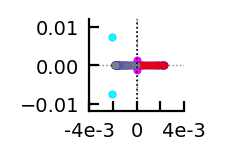

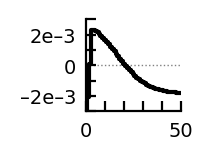

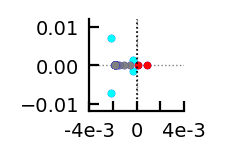

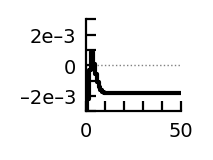

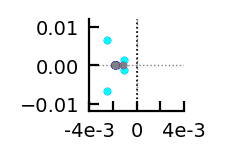

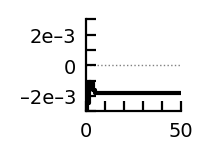

In [15]:
# Updated 2-pop cell with data storage 
# (Replace the 2-pop cell above with this code)

sigma_i = 0.2
N = 300000

for sigma_e in [0.01,0.05,0.1]:
# for sigma_e in [0.01,0.05,0.1]:
    simname = 'e%s_i%s'%(sigma_e, sigma_i)
    x, y = [], []
    
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    # Store eigenvalues for this sigma_e
    current_img_parts = []
    current_real_parts = []

    plt.figure(figsize=(15/25.4, 15/25.4), dpi=200)
    ax = plt.subplot(111)
    ax.plot([-4e3,4e3],[0,0],':',c='gray',lw=0.5,zorder=-1)
    ax.plot([0,0],[-0.12,0.12],':',c='gray',lw=.5,zorder=-1)
    for n in range(51):
        An = np.array([[-eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ei*g_bar(n, 0, sigma_i)],
             [wbar_ie*g_bar(n, 0, sigma_e), -eps -wbar_ii*g_bar(n, 0, sigma_i)]])
        eigenvalues, eigenvectors = LA.eig(An)
        real_parts=np.real(eigenvalues)
        img_parts = np.imag(eigenvalues)
        max_real = np.max(real_parts)
        x += [n-0.5,n+0.5]
        y += [max_real, max_real]
        
        # Store all eigenvalue parts for this n
        current_img_parts.extend(img_parts)
        current_real_parts.extend(real_parts)
        
        plt.scatter(real_parts, img_parts, c='blue', s=3)
#         print(real_parts, img_parts)
        for i in range(2):
            if real_parts[i]>0 and img_parts[i]>0:
                print(f'POSITIVE RE and IMG: n={n}, lambda={eigenvalues[i]}')
            

        # Masks
        real_mask   = np.isclose(img_parts, 0)
        complex_mask = ~real_mask
        stable_mask = real_parts < 0
        unstable_mask = real_parts > 0
        
        stable_real     = real_mask & stable_mask
        unstable_real   = real_mask & unstable_mask
        stable_complex  = complex_mask & stable_mask
        unstable_complex= complex_mask & unstable_mask
        
        plt.scatter(real_parts[stable_real], img_parts[stable_real], c='gray', s=3)
        plt.scatter(real_parts[unstable_real], img_parts[unstable_real], c='red', s=3)
        plt.scatter(real_parts[stable_complex], img_parts[stable_complex], c='cyan', s=3)
        plt.scatter(real_parts[unstable_complex], img_parts[unstable_complex], c='magenta', s=3)

    # Store the results for this sigma_e
    stored_img_parts_2pop.append(current_img_parts)
    stored_real_parts_2pop.append(current_real_parts)

    # plt.xlabel('real part')
    # plt.ylabel('imaginary part')
    plt.plot([0,0],[-0.05,0.05], ':', c='black',lw=0.6)
   
    
    plt.ylim(-0.012,0.012)
    plt.xlim(-0.004,0.004)
    ax.set_xticks([-0.004, -0.002,0,0.002,0.004])
    ax.set_xticklabels(['-4e-3','',0,'','4e-3'])


    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(left=0.1, bottom=0.1)
    plt.tick_params(direction='in', which='both')
    plt.savefig('figs/Fig3f_%s_spec.svg'%sigma_e)
    plt.show()
    
    plt.figure(figsize=(15/25.4, 15/25.4), dpi=200)
    # plt.figure(figsize=(4,4), dpi=200)

    plt.plot(x,np.array(y), c='black')
#     plt.plot([-0.5,50],[0,0], ':', c='black', lw=0.6)
#     plt.xlim(0,20)
#     plt.ylim(-.001,.0005)

    # plt.xlabel('Fourier component n')
    # plt.ylabel('real part of eigenvalue')
    # plt.tight_layout()
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(left=0.1, bottom=0.1)
    plt.tick_params(direction='in', which='both')
    
    ax.set_yticks([-0.003,-0.002,-0.001, 0, 0.001, 0.002, 0.003])
    ax.set_yticklabels(['','–2e–3', '', 0, '', '2e–3',''])
    ax.set_ylim(-0.003,0.003)
    ax.set_xlim(0,50)
    ax.set_xticks([10*i for i in range(6)])
    ax.set_xticklabels([0,'','','','',50])
    ax.plot([0,50], [0,0], ':', c='gray', lw=0.5, zorder=-1)

#     plt.title(simname)
    plt.savefig('figs/Fig3f_%s_n.svg'%sigma_e)
    plt.show()
    imax = np.argmax(y)
    nmax.append(x[imax])
    

### Fig. g

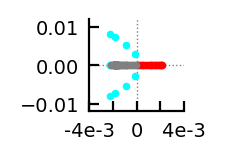

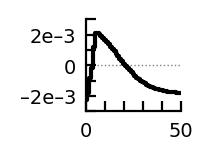

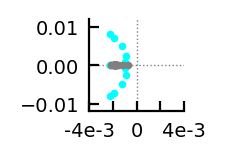

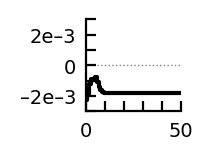

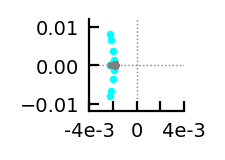

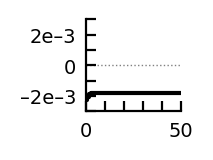

In [13]:
#4-pop
sigma_p, sigma_s = 0.1, 0.2
sigma_v = 0.1
N = 300000

for sigma_e in [0.01,0.05,0.1]:

    simname = 'e%s_p%s_s%s'%(sigma_e, sigma_p, sigma_s)
    x, y = [], []
    
    gamma=1.0
    eps = 1/(gamma*np.sqrt(N))

    # Store eigenvalues for this sigma_e
    current_img_parts = []
    current_real_parts = []

    plt.figure(figsize=(15/25.4, 15/25.4), dpi=200)
    ax = plt.subplot(111)
    ax.plot([-4e3,4e3],[0,0],':',c='gray',lw=0.5,zorder=-1)
    ax.plot([0,0],[-0.12,0.12],':',c='gray',lw=.5,zorder=-1)
    for n in range(50):
        An = np.array([[ - eps + wbar_ee*g_bar(n, 0, sigma_e), -wbar_ep*g_bar(n, 0, sigma_p), -wbar_es*g_bar(n, 0, sigma_s), -wbar_ev*g_bar(n, 0, sigma_v)],
                 [wbar_pe*g_bar(n, 0, sigma_e), -eps -wbar_pp*g_bar(n, 0, sigma_p), -wbar_ps*g_bar(n, 0, sigma_s), -wbar_pv*g_bar(n, 0, sigma_v)],
                 [wbar_se*g_bar(n, 0, sigma_e), -wbar_sp*g_bar(n, 0, sigma_p), -eps -wbar_ss*g_bar(n, 0, sigma_s), -wbar_sv*g_bar(n, 0, sigma_v)],
                     [wbar_ve*g_bar(n, 0, sigma_e), -wbar_vp*g_bar(n, 0, sigma_p), -wbar_vs*g_bar(n, 0, sigma_s), -eps-wbar_vv*g_bar(n, 0, sigma_v)] ])

        eigenvalues, eigenvectors = LA.eig(An)
        real_parts=np.real(eigenvalues)
        img_parts = np.imag(eigenvalues)
        max_real = np.max(real_parts)
        x += [n-0.5,n+0.5]
        y += [max_real, max_real]
        
        # Store all eigenvalue parts for this n
        current_img_parts.extend(img_parts)
        current_real_parts.extend(real_parts)
        
        for i in range(4):
            if real_parts[i]>0 and img_parts[i]>0:
                print(f'POSITIVE RE and IMG: n={n}, lambda={eigenvalues[i]}')

        # Masks
        real_mask   = np.isclose(img_parts, 0)
        complex_mask = ~real_mask
        stable_mask = real_parts < 0
        unstable_mask = real_parts > 0

        # Categories
        stable_real     = real_mask & stable_mask
        unstable_real   = real_mask & unstable_mask
        stable_complex  = complex_mask & stable_mask
        unstable_complex= complex_mask & unstable_mask
        
        plt.scatter(real_parts[stable_real], img_parts[stable_real], c='gray', s=3)
        plt.scatter(real_parts[unstable_real], img_parts[unstable_real], c='red', s=3)
        plt.scatter(real_parts[stable_complex], img_parts[stable_complex], c='cyan', s=3)
        plt.scatter(real_parts[unstable_complex], img_parts[unstable_complex], c='magenta', s=3)

    # Store the results for this sigma_e
    stored_img_parts.append(current_img_parts)
    stored_real_parts.append(current_real_parts)

    plt.ylim(-0.012,0.012)
    plt.xlim(-0.004,0.004)
    ax.set_xticks([-0.004, -0.002,0,0.002,0.004])
    ax.set_xticklabels(['-4e-3','',0,'','4e-3'])


    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.1, bottom=0.1)
    plt.savefig('figs/Fig3g_%s_spec.svg'%sigma_e)
    plt.show()

    plt.figure(figsize=(15/25.4, 15/25.4), dpi=200)


    plt.plot(x,np.array(y), c='black')
    ax = plt.subplot(111)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(left=0.1, bottom=0.1)
    plt.tick_params(direction='in', which='both')

    ax.set_yticks([-0.003,-0.002,-0.001, 0, 0.001, 0.002, 0.003])
    ax.set_yticklabels(['','–2e–3', '', 0, '', '2e–3',''])
    ax.set_ylim(-0.003,0.003)
    ax.set_xlim(0,50)
    ax.set_xticks([10*i for i in range(6)])
    ax.set_xticklabels([0,'','','','',50])
    ax.plot([0,50], [0,0], ':', c='gray', lw=0.5, zorder=-1)

    plt.savefig('figs/Fig3g_%s_n.svg'%sigma_e)
    plt.show()
    
    imax = np.argmax(y)
    nmax.append(x[imax])

